# Defining the Fourier Transform

## Colophon

An annotatable worksheet for this presentation is available as [**Worksheet 12**](https://cpjobling.github.io/eg-247-textbook/fourier_transform/1/worksheet12.html).

* The source code for this page is [fourier_transform/1/ft1.ipynb](https://github.com/cpjobling/eg-247-textbook/blob/master/fourier_transform/1/ft1.ipynb).

* You can view the notes for this presentation as a webpage ([HTML](https://cpjobling.github.io/eg-247-textbook/fourier_transform/1/ft1.html)). 

* This page is downloadable as a [PDF](https://cpjobling.github.io/eg-247-textbook/fourier_transform/1/ft1.pdf) file.

## Agenda

* Fourier Transform as the Limit of a Fourier Series

* Doing the Maths

* Special forms of the Fourier Transform

* Properties of the Fourier Transform

* Computing Fourier Transforms in Matlab

##  Fourier Transform as the Limit of a Fourier Series

We start by considering the pulse train that we used in the last lecture and demonstrate that the discrete line spectra for the Fourier Series becomes a continuous spectrum as the signal becomes aperiodic.

This analysis is from {cite}`boulet` pp 142&mdash;144 and 176&mdash;180.

Let $\tilde x(t)$ be the Fourier series of the rectangular pulse train shown below:

![A pulse train](./pictures/pulse_train.png)

### Fourier Series

In the [previous section](../../fourier_series/3/exp_fs2) we used

$$C_k = \frac{1}{2\pi}\int_{-\pi/w}^{\pi/w} Ae^{-jk(\Omega_0 t)}\,d(\Omega_0 t) = \frac{A}{2\pi}\int_{-\pi/w}^{\pi/w} e^{-jk(\Omega_0 t)}\,d(\Omega_0 t) $$

to compute the line spectra.

#### From the Time Point of View

If we instead take a time point-of-view and let $A = 1$

$$C_k = \frac{1}{T}\int_{-t_0}^{t_0} e^{-jk\Omega_0 t}\,dt.$$

We'll complete the analysis on the whiteboard in class.

#### The Sinc Function

The function, $\sin(\pi x)/\pi x$ crops up again and again in Fourier analysis. The Fourier coefficients $C_k$ are scaled *samples* of the real continuous *normalized sinc* function defined as follows:

$$\operatorname{sinc} u: = \frac{\sin \pi u}{\pi u},\;u \in \mathbb{R}.$$

The function is equal to 1 at $u=0$<sup>1</sup> and has zero crossings at $u=\pm n,\; n=1,2,3,\ldots$ as shown below.

#### Plot the sinc function
 
Plots: 
 
$$sinc(u) = \frac{\sin \pi u}{\pi u},\; u \in \mathbb{R}$$

In [1]:
clear all
imatlab_export_fig('print-svg')  % Static svg figures.
cd ../matlab
format compact

Error using eval
Undefined function 'imatlab_export_fig' for input arguments of type 'char'.


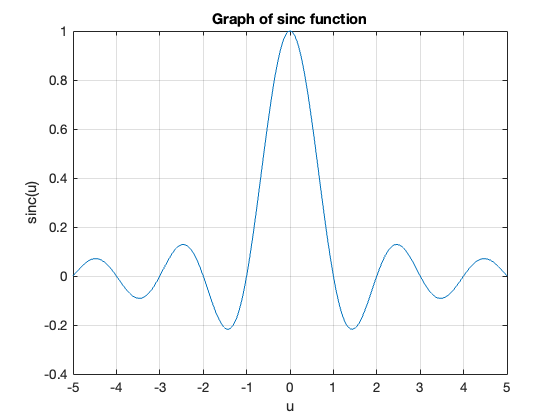

In [2]:
x = linspace(-5,5,1000);
plot(x,sin(pi.*x)./(pi.*x))
grid
title('Graph of sinc function')
ylabel('sinc(u)')
xlabel('u')

Matlab code to reproduce this plot: [plot_sinc.m](https://cpjobling.github.io/eg-247-textbook/fourier_transform/matlab/plot_sinc.m).

1. **Note** $sin(\pi u)/(\pi u)$ is undefined at $u = 0$. To compute its value we need to take the limit

$$\lim_{u\to 0} \frac{\sin(\pi u)}{\pi u}$$ 

which can be shown to be 1. I leave the discovery of the proof to you and the internet.

#### Duty cycle

* We define the duty cycle $\eta = 2t_0/T$ of the rectangular pulse train as the fraction of the time the signal is "on" (equal to 1) over one period.
* The duty cycle is often given as a percentage.

The spectral coefficients expressed using the normalized sinc function and the duty cycle can be written as

$$C_k = \frac{2t_0}{T}\frac{\sin\left(\frac{\pi k2t_0}{T}\right)}{\frac{\pi k2t_0}{T}}=\frac{2t_0}{T}\operatorname{sinc}\left(\frac{k2t_0}{T}\right)$$

$$C_k = \eta \operatorname{sinc}\left(k\eta\right)$$

#### Normalize the spectral coefficients

Let us normalize the spectral coefficients of $\tilde x(t)$ by mutiplying them by $T$, and assume $t_0$ is fixed so that the duty cycle $\eta = 2t_0/T$ will decrease as we increase $T$:

$$T C_k = T\eta \operatorname{sinc}\left(k\eta\right)=2t_0\operatorname{sinc}\left(k\frac{2t_0}{T}\right)$$

Then the normalized coefficents $T C_k$ of the rectangular wave is a sinc envelope with constant amplitude at the origin equal to $2t_0$, and a zero crossing at fixed frequency $\pi/t_0$ rad/s, both independent of $T$.

Plots follow (use [duty_cycle.mlx](https://cpjobling.github.io/eg-247-textbook/fourier_transform/matlab/duty_cycle.mlx) to reproduce).

#### Durty cycle 50%

![Duty cycle 50%](./pictures/dc_point5.png)

#### Duty cycle 12.5%

![Duty cycle 12.5%](./pictures/dc_12point5.png)

#### Comments

* As the fundamental period increases, we get more spectral lines packed into the lobes of the sinc envelope.
* These normalized spectral coefficients turn out to be samples of the continuous sinc function on the spectrum of $\tilde{x}(t)$

* The two spectra are plotted against the frequency variable $k\omega_0$ with units of rad/s rather than index of harmonic component
* The first zeros of each side of the main lobe are at frequencies $\omega = \pm \pi/t_0$ rad/s
* The zero-crossing points of sinc envelope are independent of the period T. They only depend on $t_0$.

#### Intuition leading to the Fourier Transform

* An aperiodic signal that has been made periodic by "repeating" its graph every $T$ seconds will have a line spectrum that becomes more and more dense as the fundamental period is made longer and longer.
* The line spectrum has the same continuous envelope.
* As $T$ goes to infinity, the line spectrum will become a continuous function of $\omega$.
* The *envelope* is this function.

### Doing the Maths

Fourier series coefficients for the rectangular wave are computed using:

$$C_k = \frac{1}{T}\int_{-t_0}^{t_0} \tilde{x}(t) e^{-jk(\Omega_0 t)}\,dt $$

where $\Omega_0 = 2\pi/T$ as usual.

Now define a signal $x(t)$ as a signal equal to $\tilde{x}(t)$ over one period and zero elsewhere.

![A pulse](./pictures/pulse.png)

#### A rectangular pulse

The aperiodic signal, a single rectangular pulse, can be thought of as being periodic with an infinite fundamental period (we will let $T\to +\infty$ later).

Since $\tilde{x}(t)=x(t)$ over $t \in [-T/2,T/2]$, the spectral coefficients $C_k$ of the periodic signal $\tilde{x}(t)$ can be written in terms of the aperiodic signal $x(t)$ as follows:

$$C_k = \frac{1}{T}\int_{-\infty}^{+\infty}x(t)e^{-jk\omega t} dt.$$

Let us define the envelope $X(j\omega)$ of $T C_k$ (we already know this to be the sinc function):

$$X(j\omega):= \int_{-\infty}^{+\infty}x(t)e^{-j\omega t} dt = \int_{-t_0}^{+t_0}e^{-j\omega t} dt = 2t_0\operatorname{sinc}\left(\frac{t_0}{\pi}\omega\right).$$

The coefficients $C_k$ are therefore samples of the continuous envelope $X(j\omega)$:

$$C_k = \frac{1}{T}X(jk\Omega_0).$$

#### Back to the periodic signal

$\tilde{x}(t)$ has the Fourier series representation

$$\tilde{x}(t) = \sum_{k=-\infty}^{\infty}\frac{1}{T}X(jk\Omega_0)e^{jk\Omega_0 t}.$$

or equivalently, since $\Omega_0 = 2\pi/T$:

$$\tilde{x}(t) = \frac{1}{2\pi} \sum_{k=-\infty}^{\infty}X(jk\Omega_0)e^{jk\Omega_0 t}\Omega_0.$$

#### Now take the limits

At the limit, as $T\to \infty$:

$$\tilde{x}(t) = \frac{1}{2\pi} \sum_{k=-\infty}^{\infty} X(jk\Omega_0)e^{jk\Omega_0 t}\Omega_0.$$

We get

* $\Omega_0 \to d\omega$ &ndash; the fundamental frequency becomes infinitesimally small.
* $k\Omega_0 \to \omega$ &ndash; harmonic frequencies get so close together they become a continuum.
* The summation becomes an integral.
* $\tilde{x}(t) \to x(t)$ &ndash; the periodic signal tends to the aperiodic signal.

#### Define the Inverse Fourier and Fourier Transform

Putting these elements together we have an expression for the aperiodic signal in terms of its Fourier transform:

**Inverse Fourier Transform**:

$$x(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} X(j\omega)e^{j\omega t}\,d\omega := \mathcal{F}^{-1} \left\{X(j\omega)\right\}$$

Similarly, given the expression we have already seen for an arbitrary $x(t)$:

**Fourier Transform**:

$$X(j\omega) = \int_{-\infty}^{\infty}x(t)e^{-j\omega t}\,dt := \mathcal{F}\left\{x(t)\right\}.$$

#### Fourier Transform Pair

* The two equations on the previous slide are called the *Fourier transform pair*.

* They are analogous to the *Laplace transform pair* we have already seen and we can develop tables of properties and transform pairs in the same way.
* Equation $X(j\omega) = \int_{-\infty}^{\infty}x(t)e^{-j\omega t}\,dt.$ gives the *Fourier transform* or the *frequency spectrum* of the signal $x(t)$.
* Equation $x(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} X(j\omega)e^{j\omega t}\,d\omega.$ is the *inverse Fourier transform*. It gives the function of time that has a given spectrum in the frequency domain.

## Special Forms of the Fourier Transform

The table on the next slide is developed in Section 8.2 of Karris by assuming that in general both $f(t)$ and $F(j\omega)$ are complex. So that:

$$f(t) = \Re\left\{f(t)\right\} + j\Im\left\{f(t)\right\} = f_{\mathrm{Re}}(t) + j\, f_{\mathrm{Im}}(t)$$

The Fourier transform can therefore be rewritten

$$F(j\omega) = \int_{-\infty}^{\infty}f_{\mathrm{Re}}(t)e^{j\omega t}\,dt + j\int_{-\infty}^{\infty}\, f_{\mathrm{Im}}(t)e^{j\omega t}\,dt$$

which by Euler's identity becomes

$$F(j\omega) = \int_{-\infty}^{\infty}\left[f_{\mathrm{Re}}(t)\cos\omega t + f_{\mathrm{Im}}(t)\sin\omega t\right]\,dt - j\int_{-\infty}^{\infty}\left[f_{\mathrm{Re}}(t)\sin\omega t - f_{\mathrm{Im}}(t)\cos\omega t\right]\,dt$$

So the Real and Imaginary parts of $F(j\omega)$ are

$$F_\mathrm{Re}(j\omega) = \int_{-\infty}^{\infty}\left[f_{\mathrm{Re}}(t)\cos\omega t + f_{\mathrm{Im}}(t)\sin\omega t\right]\,dt$$

$$F_\mathrm{Im}(j\omega) = - \int_{-\infty}^{\infty}\left[f_{\mathrm{Re}}(t)\sin\omega t - f_{\mathrm{Im}}(t)\cos\omega t\right]\,dt$$

We can do a similar analysis for the inverse Fourier transform.

### Time Domain and Frequecy Domain Correspondence


By consideration of the Real and Imaginary parts of $f(t)$ and $F(j\omega)$ we can construct the following table. 

<html>
<table>
<thead>
    <tr><td rowspan="2" style="text-align: center;">f(t)</td><td colspan="5" style="text-align: center;">F(j⍵)</td></tr>
    <tr><td>Real</td><td>Imaginary</td><td>Complex</td><td>Even</td><td>Odd</td></tr>
</thead>
<tbody>
<tr><td>Real</td><td>&nbsp;</td><td>&nbsp;</td><td>√</td><td>&nbsp;</td><td>&nbsp;</td></tr>
<tr><td>Real and Even</td><td>√</td><td>&nbsp;</td><td>&nbsp;</td><td>√</td><td>&nbsp;</td></tr>
<tr><td>Real and Odd</td><td>&nbsp;</td><td>√</td><td>&nbsp;</td><td>&nbsp;</td><td>√</td></tr>
<tr><td>Imaginary</td><td>&nbsp;</td><td>&nbsp;</td><td>√</td><td>&nbsp;</td><td>&nbsp;</td></tr>
<tr><td>Imaginary and Even</td><td>&nbsp;</td><td>√</td><td>&nbsp;</td><td>√</td><td>&nbsp;</td></tr>
<tr><td>Imaginary and Odd</td><td>√</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>√</td></tr>
</tbody>
</table>
</html>

See {cite}`karris` Sections **8.2.1 Real-Time Functions** and **8.2.2 Imaginary Time Functions** which summarizes the *nature* of the Fourier transform for particular types of the signal.

### A useful consequence for $f(t)$ real

If $f(t)$ is real (even or odd), the real part of $F(j\omega)$ is even, and the imaginary part is odd.

Then, for $f(t)$ real:

$$F_\mathrm{Re}(-j\omega)=F_\mathrm{Re}(j\omega)$$

and

$$F_\mathrm{Im}(-j\omega)=-F_\mathrm{Im}(j\omega)$$

Since

$$F(j\omega) = F_\mathrm{Re}(j\omega)+jF_\mathrm{Im}(j\omega)$$ 

it follows that

$$F(-j\omega) = F_\mathrm{Re}(-j\omega)+jF_\mathrm{Im}(-j\omega) = F_\mathrm{Re}(j\omega)-jF_\mathrm{Im}(j\omega)$$ 

or

$$F(-j\omega) = F^*(j\omega)$$

## Properties of the Fourier Transform

Again, we will provide any properties that you might need in the examination.
    
You will find a number of these in the accompanying notes.

For fun, you may like to read and even complete the proofs for these properties guided by the text books {cite}`karris` (Section 8.3) or {cite}`boulet` pp 180&mdash;185.

We are more interested in your ability to exploit the properties in problem solving.

A little more detail is given in the notes available on Blackboard.

### Linearity

The Fourier transform is a linear operation:

$$a_1f_1(t)+a_2f_2(t)+\cdots+a_nf_n(t)\Leftrightarrow a_1F_1(j\omega)+a_2F_2(j\omega)+\cdots+a_nF_n(j\omega)$$

### Symmetry

If $F(j\omega)$ is the Fourier transform of $f(t)$, the *symmetry property of the Fourier transform* states that

$$F(t)\Leftrightarrow2\pi f(-j\omega)$$

That is if in $F(j\omega)$ we replace $j\omega$ with $t$, we obtain this pair.

### Time/Frequency Scaling

Scaling the time variable with $\alpha  \in \mathbb{R}$ either expands or compresses the Fourier transform:

$$f(\alpha t)\Leftrightarrow \frac{1}{|\alpha|}F\left(j\frac{\omega}{\alpha}\right)$$

* For $\alpha > 0$, the signal $f(\alpha t)$ is sped up (or compressed in time), so its frequency components will be expanded to higher frequencies.
* For $\alpha < 0$, the signal $f(\alpha t)$ is slowed down (or expanded in time), so its frequency components will be compressed to lower frequencies.

### Time Shifting

A time shift results in a phase shift in the Fourier transform

$$f(t-t_0) \Leftrightarrow e^{-j\omega t_0}F(j\omega)$$

### Frequency Shifting

Multiplying a time function by a complex exponential resuls in a frequency shift

$$e^{j\omega 0}f(t) \Leftrightarrow X(j\omega-j\omega_0)$$

### Time Differentiation

If $F(j\omega)$ is the Fourier transform of $f(t)$

$$\frac{d^n}{dt^n}\,f(t)\Leftrightarrow (j\omega)^nF(j\omega)$$

### Frequency Differentiation

If $F(j\omega)$ is the Fourier transform of $f(t)$

$$(-jt)^n f(t)\Leftrightarrow \frac{d^n}{d\omega^n}F(j\omega)$$

### Time Integration

If $F(j\omega)$ is the Fourier transform of $f(t)$

$$\int_{-\infty}^{t}f(\tau)d\tau \Leftrightarrow \frac{F(j\omega)}{j\omega}+\pi F(0)\delta(\omega)$$

### Conjugate Time and Frequency Functions

If $F(j\omega)$ is the Fourier transform of the complex function $f(t)$

$$f^*(t)\Leftrightarrow F^*(-j\omega)$$

### Time Convolution

$$f_1(t)*f_2(t) \Leftrightarrow F_1(j\omega) F_2(j\omega)$$

That is convolution in the time domain corresponds to multiplication in the frequency domain.

(Compare with Laplace Transform)

### Frequency Convolution

$$f_1(t)f_2(t) \Leftrightarrow \frac{1}{2\pi} F_1(j\omega)*F_2(j\omega)$$

That is, multiplication in the time domain corresponds to convolution in the frequency domain.

This also has application to amplitude modulation as shown in {cite}`boulet` pp 182&mdash;183.

### Area under $f(t)$

$$\int_{-\infty}^{\infty} f(t)\,dt = F(0)$$

That is, the area under a time function $f(t)$ is equal to the value of the Fourier transform of $f(t)$ evaluated at $\omega = 0$ rad/s.

### Area under $F(j\omega)$

$$f(0) = \frac{1}{2\pi}\int_{-\infty}^{\infty} F(j\omega)\,d\omega$$

That is, the value of a time function, $f(t)$, evaluated at $t=0$ is equal to the area under its Fourier transform $F(j\omega)$ times $1/2\pi$.

### Energy-Density Spectrum

Recalling that the power spectrum of a periodic signal is defined as the squared magnitudes of its Fourier series coefficients. A plot of the power spectrum of a signal gives us an idea of the power at different frequencies (harmonics).

By analogy, the *energy-density spectrum* of an aperiodic signal is defined as the magnitude squared of its spectrum; that is 

$$|F(j\omega)|^2$$

is the energy-density spectrum of $f(t)$.

For example

$$E_{[\omega_1,\omega_2]}:=\frac{1}{2\pi}\int_{\omega_1}^{\omega_2}|F(j\omega)|^2\,d\omega.$$

Note that for real signals, it is customary to include the negative frequency band as well.

### Parseval's Theorem

Just like the total average power of a periodic signal is equal to the sume of the powers of all the harmonics, the total energy in an aperidic signal is equal to the total energy in its sepctrum.

This is the Parseval equality for Fourier transforms:

$$\int_{-\infty}^{\infty}|f(t)|^2\,dt=\frac{1}{2\pi}\int_{-\infty}^{\infty}|F(j\omega)|^2\,d\omega.$$

## Table of Properites of the Fourier Transform

As was the case of the Laplace Transform, properties of Fourier transforms are usually summarized in Tables of Fourier Transform properties. For example this one: [Properties of the Fourier Transform (Wikpedia)](https://en.wikipedia.org/wiki/Fourier_transform#Properties_of_the_Fourier_transform) and Table 8.8 in {cite}`karris` (page 8-17).

More detail and some commentry is given in the printable version of these notes.

| No. | **Name** | $f(t)$ | $F(j\omega)$ | **Remarks** |
|----:|----------|--------|--------------|-------------|
| 1.   | Linearity | $a_1f_1(t)+a_2f_2(t)+\cdots+a_nf_n(t)$ | $a_1F_1(j\omega)+a_2F_2(j\omega)+\cdots+a_nF_n(j\omega)$ | Fourier transform is a linear operator. |
| 2.   | Symmetry | $2\pi f(-j\omega)$ | $F(t)$ | |
| 3.  | Time and frequency scaling | $f(\alpha t)$ | $\displaystyle{\frac{1}{\lvert\alpha\rvert}F\left(j\frac{\omega}{\alpha}\right)}$ | time compression is frequency expansion and *vice versa* |
| 4.  | Time shifting | $\displaystyle{f(t-t_0)}$ | $\displaystyle{e^{-j\omega t_0}F(j\omega)}$ | A time shift corresponds to a phase shift in frequency domain |
| 5.  | Frequency shifting | $\displaystyle{e^{j\omega_0 t}f(t)}$ | $\displaystyle{F(j\omega-j\omega_0)}$ | Multiplying a signal by a complex exponential results in a frequency shift. |
| 6.  | Time differentiation | $\displaystyle{\frac{d^n}{dt^n}\,f(t)}$ | $\displaystyle{(j\omega)^nF(j\omega)}$ | |
| 7.  | Frequency differentiation | $\displaystyle{(-jt)^n f(t)}$ | $\displaystyle{\frac{d^n}{d\omega^n}F(j\omega)}$ | |
| 8.  | Time integration | $\displaystyle{\int_{-\infty}^{t}f(\tau)d\tau}$ | $\displaystyle{\frac{F(j\omega)}{j\omega}+\pi F(0)\delta(\omega)}$ | |
| 9.  | Conjugation | $\displaystyle{f^*(t)}$ | $\displaystyle{F^*(-j\omega)}$ | |
| 10. | Time convolution | $\displaystyle{f_1(t)*f_2(t)}$ | $\displaystyle{F_1(j\omega) F_2(j\omega)}$ | Compare with Laplace Transform | |
| 11. | Frequency convolution | $\displaystyle{f_1(t)f_2(t)}$ | $\displaystyle{\frac{1}{2\pi}F_1(j\omega)*F_2(j\omega)}$ | This has application to amplitude modulation as shown in Boulet pp 182&mdash;183. |
| 12. | Area under $f(t)$ | $\displaystyle{\int_{-\infty}^{\infty} f(t)\,dt = F(0)}$ | | Way to calculate DC (or average) value of a signal |
| 13. | Area under $F(j\omega)$ | $\displaystyle{f(0) = \frac{1}{2\pi}\int_{-\infty}^{\infty}F(j\omega)\,d\omega}$ |  |
| 14. | Energy-Density Spectrum | $\displaystyle{E_{[\omega_1,\omega_2]}:=\displaystyle{\frac{1}{2\pi}\int_{\omega_1}^{\omega_2}\lvert F(j\omega)\rvert ^2\,d\omega.}}$ | |
| 15. | Parseval's theorem | $\displaystyle{\int_{-\infty}^{\infty}\lvert f(t)\rvert^2\,dt=\displaystyle{\frac{1}{2\pi}\int_{-\infty}^{\infty}\lvert F(j\omega)\rvert ^2\,d\omega.}}$ | | Definition RMS follows from this |

See also: [Wikibooks: Engineering Tables/Fourier Transform Properties](https://en.wikibooks.org/wiki/Engineering_Tables/Fourier_Transform_Properties) and [Fourier Transform&mdash;WolframMathworld](https://mathworld.wolfram.com/FourierTransform.html) for more complete references.

## Examples

1. Amplitude Modulation
2. Impulse response
3. Energy computation

### Example 1: Amplitude Modulation

Compute the result of multiplying a signal $f(t)$ by a carrier waveform $\cos \omega_c t$.

*Hint* use Euler's identity and the frequency shift property

### Example 2: Impulse response

A system has impulse response $f(t) = e^{-t}u_0(t)$. Compute the frequency sprectrum of this system.

### Example 3: Energy computation

An aperiodic real signal $f(t)$ has Fourier transform $F(j\omega)$. Compute the energy contained the signal between 5kHz and 10kHz.

## Computing Fourier Transforms in MATLAB

MATLAB has the built-in **fourier** and **ifourier** functions that can be used to compute the Fourier transform and its inverse. 

For now, here's an example:

### Example

Use MATLAB to confirm the Fourier transform pair:
    
$$e^{-\frac{1}{2}t^2}\Leftrightarrow \sqrt{2\pi}e^{-\frac{1}{2}\omega^2}$$

In [3]:
syms t v omega x;
ft = exp(-t^2/2);
Fw = fourier(ft,omega)

Fw =


2.5066*exp(-0.5000*omega^2)


In [4]:
pretty(Fw)

                 2
exp(-0.5000 omega ) 2.5066



Check by computing the inverse using ifourier

In [5]:
ft = ifourier(Fw,t)

ft =


exp(-0.5000*t^2)


See script: [ftex1.m](https://cpjobling.github.io/eg-247-textbook/fourier_transform/matlab/ftex1.m).

## Summary

* Fourier Transform as the Limit of a Fourier Series
* Doing the Maths
* Special forms of the Fourier Transform
* Properties of the Fourier Transform
* Computing Fourier Transforms in Matlab

*Next Section*

* [Fourier transform of commonly occuring signals](../2/ft2)

## References

See [Bibliography](/zbib).

## Worked Solutions

### Let's complete the analysis in the notebook

$$C_k = \frac{1}{T}\int_{-t_0}^{t_0} e^{-jk\Omega_0 t}\,dt = -\frac{1}{jk\Omega_0 T}\left[e^{-jk\Omega_0 t}\right]_{-t_0}^{t_0} = -\frac{1}{jk\Omega_0 T}\left(e^{-jk\Omega_0 t_0}-e^{jk\Omega_0 t_0}\right)$$

$$C_k = \frac{2}{k\Omega_0 T}\left(\frac{e^{jk\Omega_0 t_0}-e^{-jk\Omega_0 t_0}}{2j}\right) = 2\frac{\sin(k\Omega_0 t_0)}{k\Omega_0 T}$$

and since $\Omega = 2\pi/T$

$$C_k = \frac{\sin\left(\pi k\frac{2t_0}{T}\right)}{k\pi } = \frac{2t_0}{T}{\mathop{\rm sinc}}\left( k\frac{2t_0}{T}\right)$$

### Solution 1

$$\cos\omega_c t = \frac{e^{j\omega_c t}+e^{-j\omega_c t}}{2}$$

it follows from the *frequency shifting* property that

$$f(t)\cos\omega_c t \Leftrightarrow \frac{F(j\omega-j\omega_c)+F(j\omega + j\omega_c)}{2}.$$

Similarly

$$f(t)\sin\omega_c t \Leftrightarrow \frac{F(j\omega-j\omega_c)-F(j\omega + j\omega_c)}{j2}.$$

### Remarks

We can also tackle this using the Frequency Convolution property. See {cite}`boulet` pp 182&mdash;183.

### Solution 2

$$
    \begin{eqnarray*}
      \mathcal{F}\left\{ e^{-t}u_0(t) \right\} &=& \int_0^\infty  e^{-t}u_0(t) e^{ - j\omega t}\;dt \\ 
       &=& \int_0^\infty  e^{-(1 + j\omega )t} \;dt \\ 
       &=&  - \frac{1}{j\omega  + 1}\left[ e^{ - (1 + j\omega )t} \right]_0^\infty  =  - \frac{1}{j\omega  + 1}\left[ {0 - 1} \right] \\ 
      F(j\omega ) &=& \frac{1}{j\omega  + 1} \\ 
    \end{eqnarray*}
$$

Thus

$$e^{ - t}{u_0}(t)\Leftrightarrow \frac{1}{j\omega  + 1}$$

### Solution 3

Use the Energy-Density function.

$$E_{[10,000\pi,20,000\pi]}^r=\frac{1}{2\pi}\left[\int_{10,000\pi}^{20,000\pi}|X(j\omega)|^2\,d\omega + \frac{1}{2\pi}\int_{-20,000\pi}^{-10,000\pi}|X(j\omega)|^2\,d\omega\right] = \frac{1}{\pi}\int_{10,000\pi}^{20,000\pi}|X(j\omega)|^2\,d\omega.$$